In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt

import pandas as pd
data = pd.read_csv(r'D:\research project\Hyperspectral_data_millets_11_varieties.csv')

X = data.drop(columns=['Samples', 'Carbohydrate'])  
y = data['Carbohydrate']  

print(data.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R2 Score: {r2_linear}")



  Samples    887.46    892.32    897.18    902.04     906.9    911.76  \
0   ROI_1  0.191680  0.191695  0.193405  0.192889  0.193887  0.194452   
1   ROI_2  0.215528  0.215750  0.217852  0.217218  0.218198  0.218672   
2   ROI_3  0.178574  0.178598  0.180263  0.179994  0.180704  0.181075   
3   ROI_4  0.185967  0.185727  0.187590  0.186914  0.187316  0.188200   
4   ROI_5  0.213839  0.214271  0.216537  0.215953  0.216874  0.217685   

     916.63    921.49    926.36  ...   1683.71   1688.87   1694.04    1699.2  \
0  0.193112  0.194218  0.194924  ...  0.151565  0.147515  0.142738  0.138215   
1  0.217449  0.218199  0.219218  ...  0.161870  0.157835  0.153030  0.148521   
2  0.179741  0.180426  0.181107  ...  0.149569  0.145551  0.140847  0.136343   
3  0.187088  0.187825  0.188305  ...  0.143136  0.139138  0.134551  0.130493   
4  0.216615  0.217741  0.218498  ...  0.152982  0.148794  0.144054  0.139883   

    1704.37   1709.54   1714.71   1719.88   1725.06  Carbohydrate  
0  0.135362 

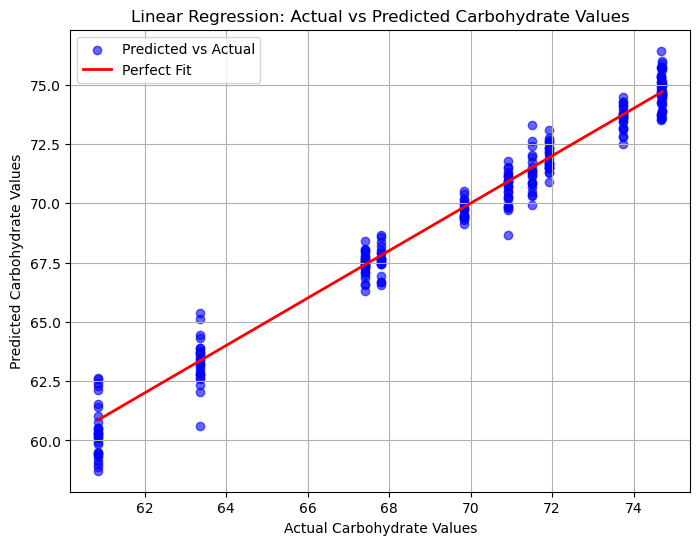

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Carbohydrate Values')
plt.ylabel('Predicted Carbohydrate Values')
plt.title('Linear Regression: Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()

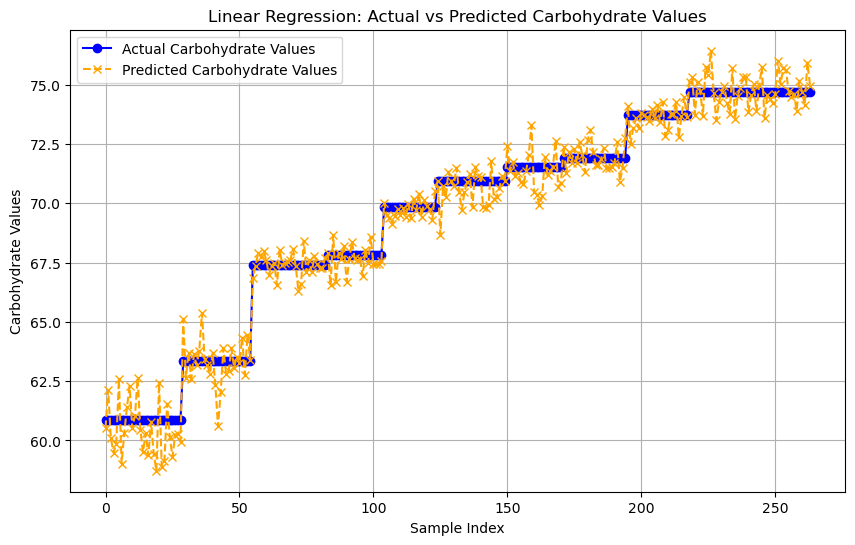

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting values for a clearer line plot (optional, but helps with visualization)
y_test_sorted_idx = np.argsort(y_test)
y_test_sorted = y_test.iloc[y_test_sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_linear).iloc[y_test_sorted_idx].reset_index(drop=True)

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Carbohydrate Values', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Predicted Carbohydrate Values', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Carbohydrate Values')
plt.title('Linear Regression: Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_linear})
print(comparison_df)

     Actual  Predicted
0     73.73  73.618278
1     73.73  73.638810
2     73.73  74.483178
3     71.92  72.298049
4     67.41  67.358541
..      ...        ...
259   67.81  67.467363
260   67.81  67.636587
261   71.52  71.728740
262   70.92  69.925871
263   69.84  69.441038

[264 rows x 2 columns]
